In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
meanMeds = pd.read_csv('meanMedsFiltered.csv')

In [6]:
# Z-test for statiscical significance of median increase
for year in range(2019, 2024):
    meanMeds[f'z-MedIncrease{year}'] = stats.zscore(meanMeds[f'medIncrease{year}'])

    # Find p-value from z-score, multiplied by 2 for 2 tailed test
    meanMeds[f'p-MedIncrease{year}'] = stats.norm.sf(meanMeds[f'z-MedIncrease{year}'])




In [7]:
def chi2(year):
    pvalues = []
    for i, row in meanMeds.iterrows():
        # get dicts from the string they are stored as
        dict1 = ast.literal_eval(row[f'race{year-1}'])
        dict2 = ast.literal_eval(row[f'race{year}'])

        # get a set of all keys
        keys = set(dict1.keys()).union(dict2.keys())

        dict1F = {key: dict1.get(key, 0) for key in keys}
        dict2F = {key: dict2.get(key, 0) for key in keys}


        table = [[dict1F[k], dict2F[k]] for k in keys]

        stat, p, dof, expected = stats.chi2_contingency(table)
        pvalues.append(p)
    
    return pvalues

for i in range(2019,2024):
    meanMeds[f'chi{i}'] = chi2(i)

In [8]:
def regplot(x, y, title = '', xtitle = '', ytitle = ''):
    print(f'Coefficient: {x.corr(y)}')
    NAs = np.logical_or(x.isna(), y.isna())
    r, p = stats.pearsonr(x[~NAs], y[~NAs])
    print(f'R: {r} \nR2 {r**2} \nP: {p}')
    sns.regplot(x=x, y=y, line_kws={'color': 'red'})
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

In [9]:
print(meanMeds['medIncrease2023'].describe())

count    2933.000000
mean        1.029258
std         0.075076
min         0.616179
25%         1.000000
50%         1.035088
75%         1.067308
max         1.457143
Name: medIncrease2023, dtype: float64


Coefficient: -0.018910635500879867
R: -0.01891063550087987 
R2 0.00035761213504713807 
P: 0.3059289722571242


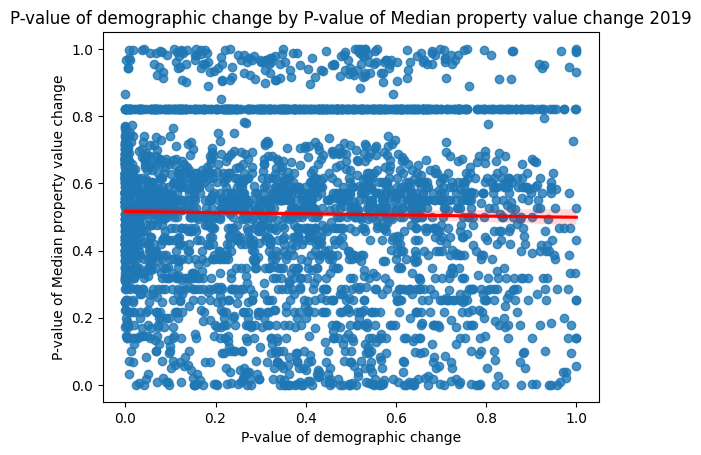

Coefficient: -0.11029046516965504
R: -0.11029046516965507 
R2 0.0121639867073389 
P: 2.114577677428722e-09


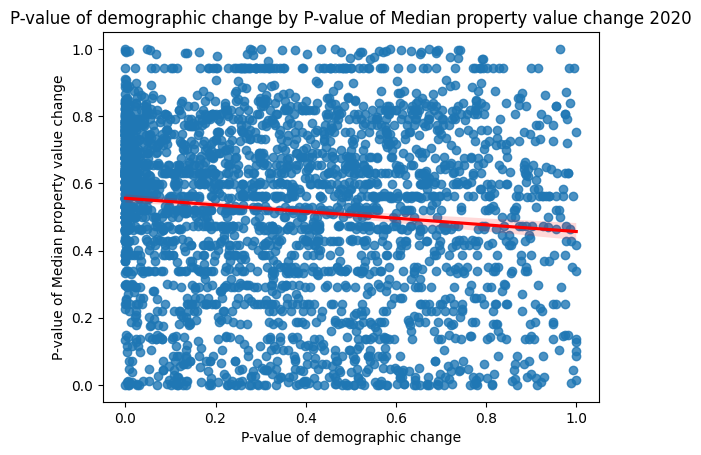

Coefficient: 0.006090452316853703
R: 0.00609045231685371 
R2 3.709360942386872e-05 
P: 0.7416235020240731


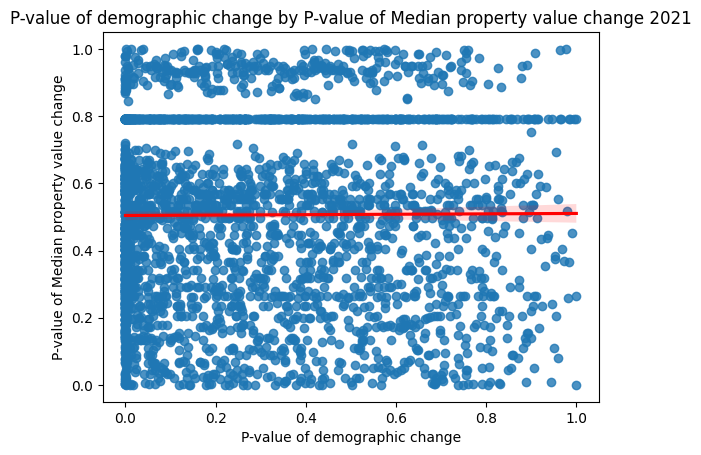

Coefficient: 0.09808426130838761
R: 0.09808426130838761 
R2 0.009620522316412063 
P: 1.0232803951833069e-07


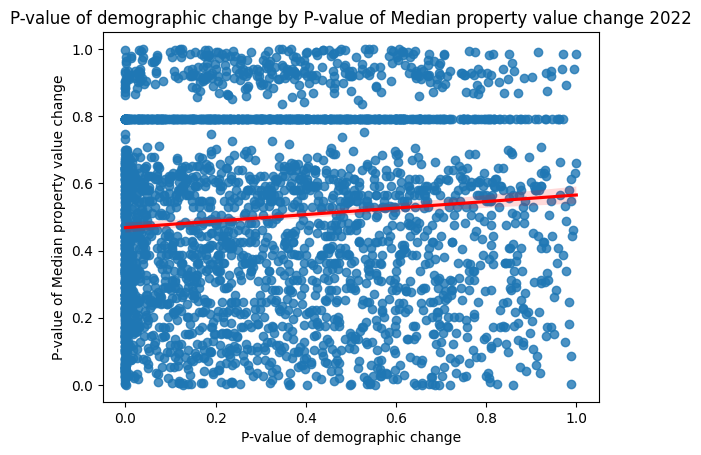

Coefficient: -0.003949940881305308
R: -0.003949940881305321 
R2 1.5602032965807056e-05 
P: 0.8306817336163934


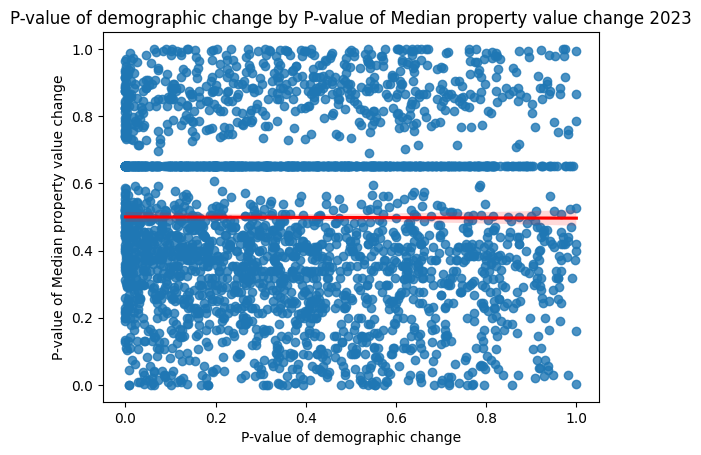

In [10]:
for i in range(2019, 2024):
    regplot(x=meanMeds[f'chi{i}'], y=meanMeds[f'p-MedIncrease{i}'], 
            title=f'P-value of demographic change by P-value of Median property value change {i}',
            xtitle='P-value of demographic change',
            ytitle='P-value of Median property value change')

Coefficient: 0.02697721538909679
R: 0.02697721538909679 
R2 0.0007277701501497205 
P: 0.14411071816203586


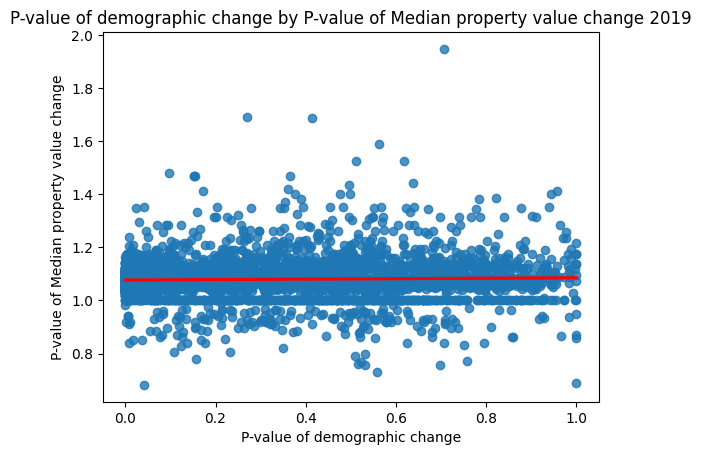

Coefficient: 0.08888643573868725
R: 0.08888643573868732 
R2 0.007900798458327791 
P: 1.4260279345647275e-06


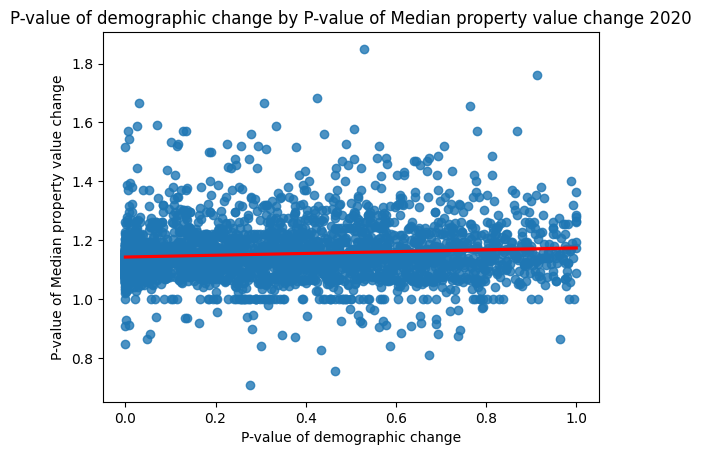

Coefficient: -0.0031872515994534195
R: -0.0031872515994534126 
R2 1.0158572758218337e-05 
P: 0.8630134786752347


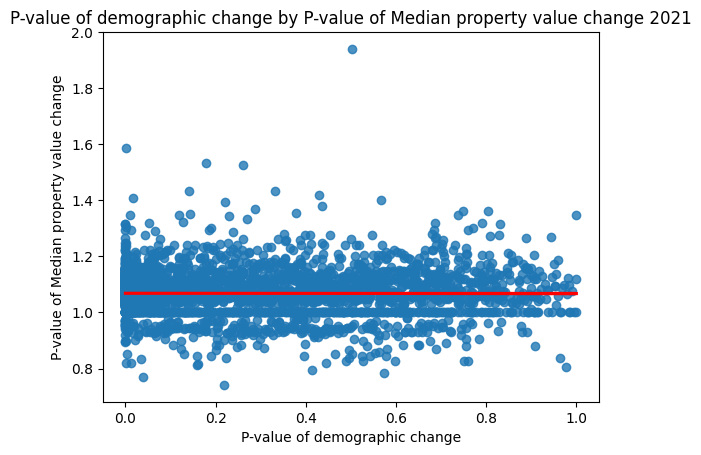

Coefficient: -0.0792737841277223
R: -0.07927378412772232 
R2 0.006284332849928719 
P: 1.7220642865125585e-05


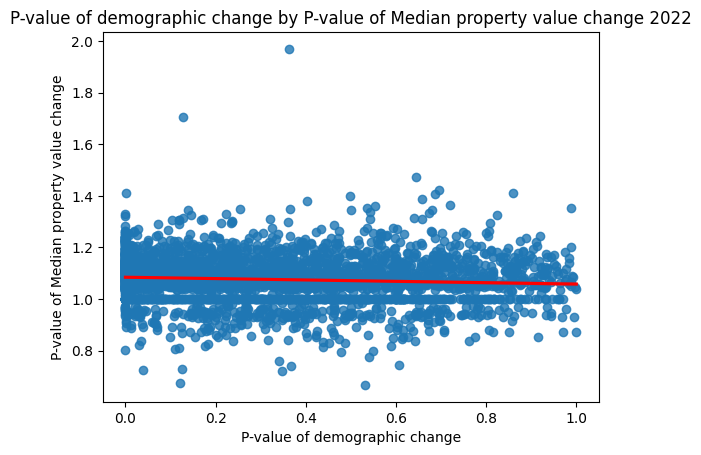

Coefficient: -0.0054210229700444494
R: -0.005421022970044447 
R2 2.9387490041749514e-05 
P: 0.7691672690663248


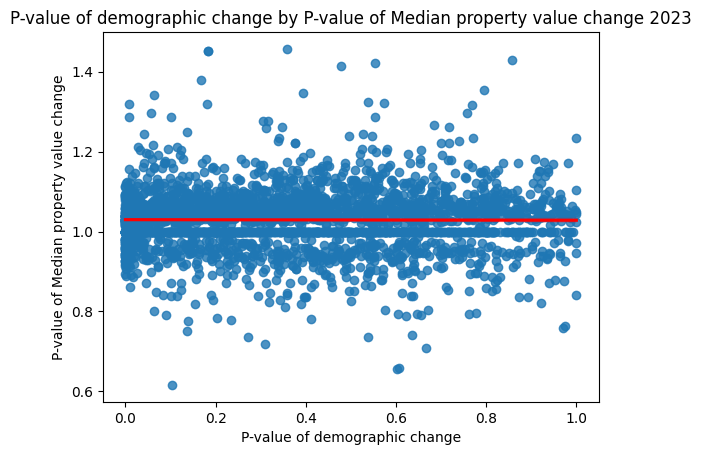

In [11]:
for i in range(2019, 2024):
    regplot(x=meanMeds[f'chi{i}'], y=meanMeds[f'medIncrease{i}'], 
            title=f'P-value of demographic change by P-value of Median property value change {i}',
            xtitle='P-value of demographic change',
            ytitle='P-value of Median property value change')
    
    # are there localized changes in each, start from 'are certain areas effected more'
    # look at minority to white change
    # baseline for not experiencing change

In [ ]:
czconnect = pd.read_csv(r'..\loadData\data\external\Citizen_Connect_-_County_data__live__20241210.csv')
# Filter for only commuting and demographic data
commuters = czconnect[czconnect['Category'] == 'Commuting']
demographics = czconnect[czconnect['Category'] == 'Demographics']
del czconnect

resPermits = pd.read_csv(r'..\loadData\data\external\Residential_Construction_Permits_by_County_5026727375813176131.csv')

# years are separated by columns, so filter for only applicable years
dataRange = ['GEOID']
for year in range(2018, 2023):
    dataRange.append(f'ALL_PERMITS_{year}')
    dataRange.append(f'SINGLE_FAMILY_PERMITS_{year}')
    dataRange.append(f'ALL_MULTIFAMILY_PERMITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_2_UNITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_3_4_UNITS_{year}')
    dataRange.append(f'MULTIFAMILY_PERMITS_5_OR_MORE_UNITS_{year}')
# These two are labeled slightly differently, no idea why
dataRange[-2], dataRange[-1] = ['MULTIFAMILY_PERMITS_3_4_UNIT_2022', 'MULTIFAMILY_PERMITS_5_OR_MORE_2022']
resPermits = resPermits[dataRange]
resPermits.index = resPermits['GEOID']


['Commuting' 'Bridges' 'Demographics' 'Person trips' 'Maritime' 'Business'
 'Airports' 'Railroad']


Coefficient: 0.08007071041270587
R: 0.0800707104127059 
R2 0.006411318665995409 
P: 0.4830110983958962


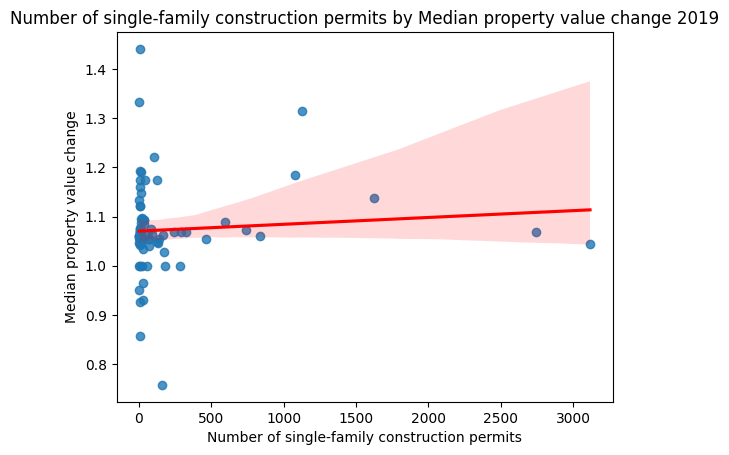

Coefficient: 0.07649961282729106
R: 0.07649961282729105 
R2 0.005852190762725433 
P: 0.49454323140051704


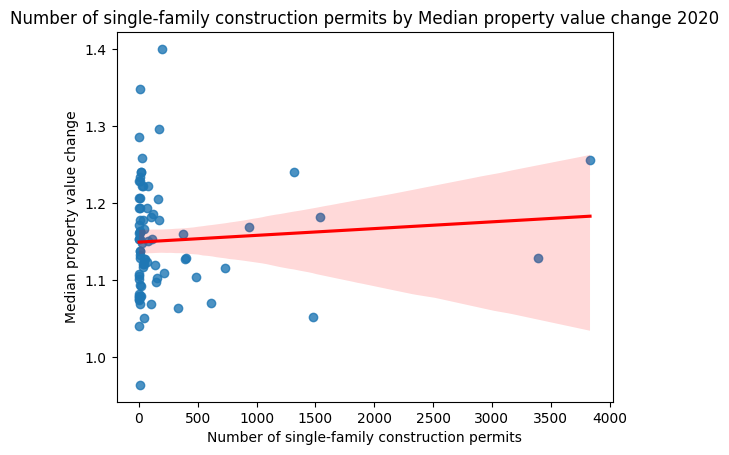

Coefficient: -0.03634240484069535
R: -0.03634240484069534 
R2 0.0013207703896049962 
P: 0.7251884716781427


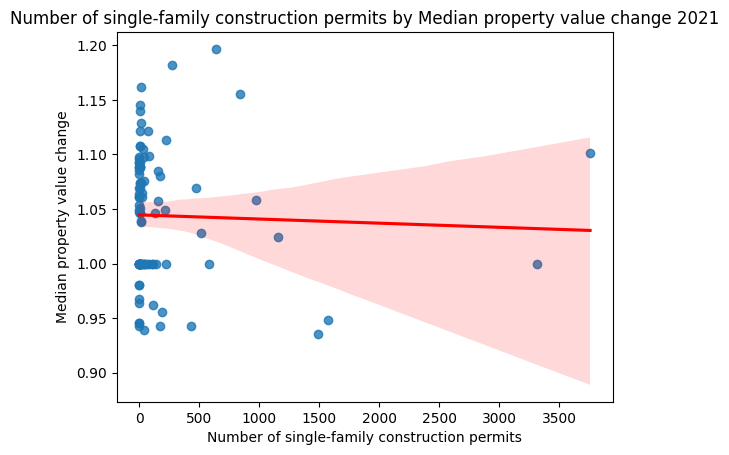

Coefficient: 0.16280873372517707
R: 0.16280873372517704 
R2 0.0265066837771956 
P: 0.15996009806213513


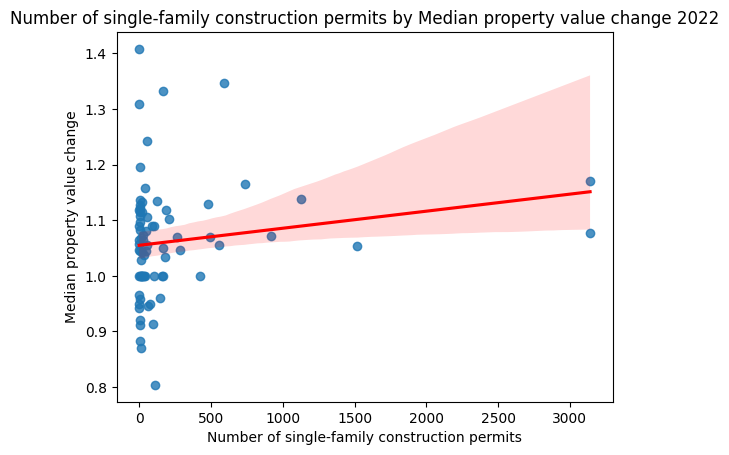

In [ ]:
temp = resPermits.copy()
for i in range(2019, 2023):
    temp[f'medincrease{i}'] = meanMeds[f'medIncrease{i}']
    # sns.regplot(x=temp[f'SINGLE_FAMILY_PERMITS_{i}'], y=temp[f'medincrease{i}'])
    # plt.show()
    regplot(x=temp[f'SINGLE_FAMILY_PERMITS_{i}'], y=temp[f'medincrease{i}'], 
            title=f'Number of single-family construction permits by Median property value change {i}',
            xtitle='Number of single-family construction permits',
            ytitle='Median property value change')




# FEMA, remove disaster areas (disaster decleration)

In [ ]:
commuters = commuters[(commuters['Year'] == 2018) | (commuters['Year'] == 2019)]
df = commuters.pivot_table(index='GEOID', columns=['Year', 'Variable'], values='Value')

def chi2com(year):
    pvalues = []
    for i, row in df.iterrows():

        table = [[row[(2018, 'Commute by car/ truck/van')],
                row[(2018, 'Commute by public transportation')],
                row[(2018, 'Work at home')]], 
                [row[(2019, 'Commute by car/ truck/van')],
                row[(2019, 'Commute by public transportation')],
                row[(2019, 'Work at home')]]]

        try:
            stat, p, dof, expected = stats.chi2_contingency(table)
            pvalues.append(p)
        except ValueError:
            pvalues.append(1.0)
            continue
    
    return pvalues

df['workerchange'] = chi2com(2019)

# quantify commuter change

Coefficient: 0.07386965356561445
R: nan 
R2 nan 
P: nan


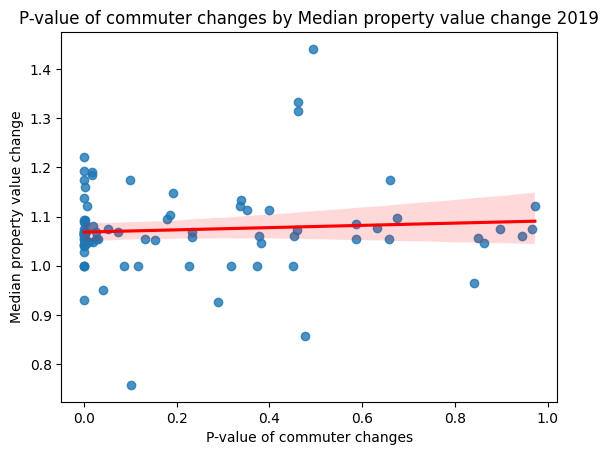

Coefficient: -0.04031939077579652
R: nan 
R2 nan 
P: nan


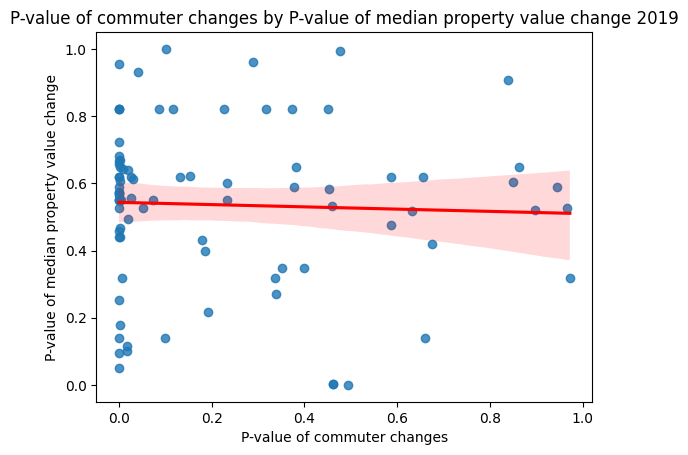

In [ ]:
df = df[df['workerchange'] != 1.0]
df['medincrease2019'] = meanMeds['medIncrease2019']
df['p-MedIncrease2019'] = meanMeds['p-MedIncrease2019']



regplot(x=df['workerchange'], y=df[f'medincrease2019'], 
        title=f'P-value of commuter changes by Median property value change 2019',
        xtitle='P-value of commuter changes',
        ytitle='Median property value change')

regplot(x=df['workerchange'], y=df[f'p-MedIncrease2019'], 
        title=f'P-value of commuter changes by P-value of median property value change 2019',
        xtitle='P-value of commuter changes',
        ytitle='P-value of median property value change')

Coefficient: 0.11842317033770103
R: nan 
R2 nan 
P: nan


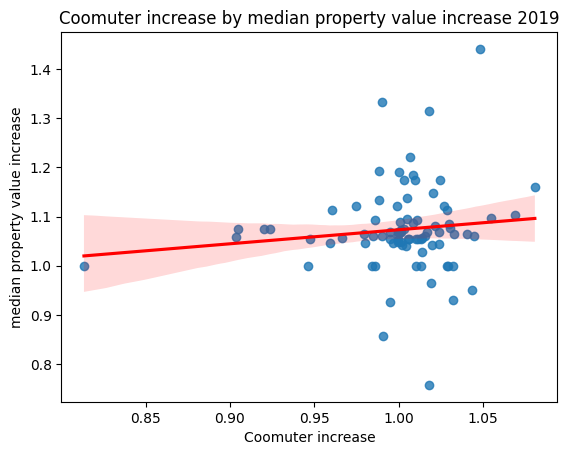

In [ ]:
df['commDif'] = df[(2019, 'Commute by car/ truck/van')]/df[(2018, 'Commute by car/ truck/van')]
# sns.regplot(x=df['commDif'], y=df[f'medincrease2019'])
# plt.show()

regplot(x=df['commDif'], y=df[f'medincrease2019'], 
        title=f'Coomuter increase by median property value increase 2019',
        xtitle='Coomuter increase',
        ytitle='median property value increase')

# Unuasable data
Some of the demographics from the citizens connect county data seem to be broken. The values in many rows are all equal despite the fact that one of the rows is supposed to be a the total and others subsets. Additionally, median household income is under the category 'demographics'. Due to this, I will only be using the median household income data from this section.

In [ ]:
demographics = demographics[(demographics['Year'] == 2018) | (demographics['Year'] == 2019)]
demo = demographics.pivot_table(index='GEOID', columns=['Year', 'Variable'], values=['Value', 'Denominator'])

# pivot and get median household income from dataset
income = demographics.pivot_table(index='GEOID', columns=['Year', 'Variable'], values='Value')[[(2018, 'Median Household Income'), 
(2019, 'Median Household Income')]]